Null values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dataset statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


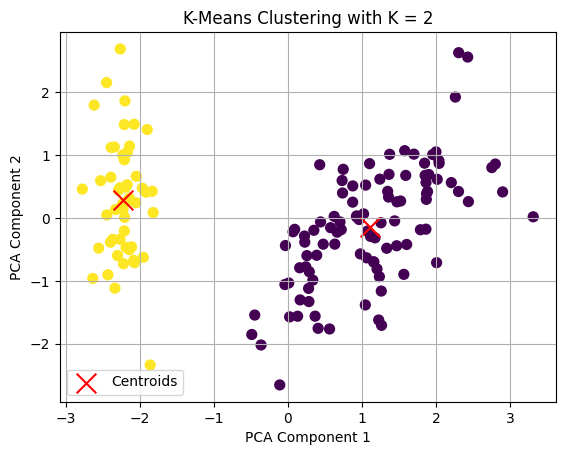

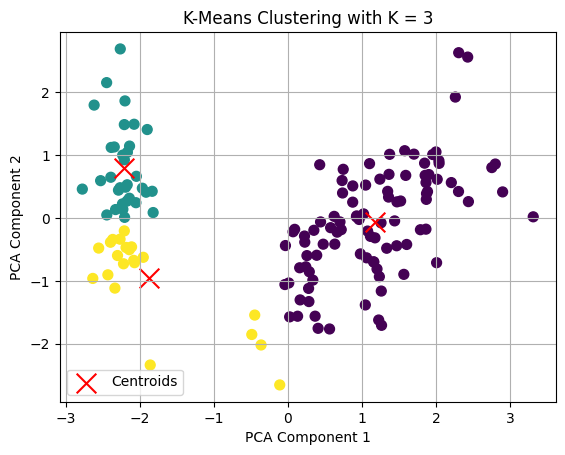

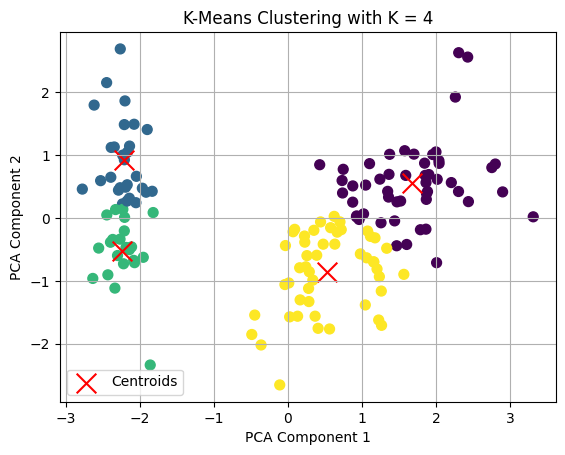


--- K-Means Clustering Performance Comparison ---
   K  Inertia (SSE)  Silhouette Score
0  2     222.361705          0.581750
1  3     191.024737          0.479881
2  4     114.354072          0.385045

--- Inference / Analysis ---
1. Dataset: Iris (unsupervised; true labels not used).
2. Data was preprocessed via standardization and reduced to 2D with PCA for visualization.
3. K-Means was applied for K = 2, 3, 4.
4. Inertia (SSE) decreased with higher K, indicating tighter clusters.
5. Silhouette Score peaked at K = 2 or 3, suggesting optimal compactness and separation.
6. PCA plots show distinct clusters, especially for K = 3, which aligns with true Iris species.
7. K = 3 is likely optimal for this dataset based on visual and metric analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Step 1: Load Dataset ---
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# --- Step 2: Preprocessing ---
print("Null values in dataset:\n", df.isnull().sum())
print("\nDataset statistics:\n", df.describe())

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# --- Step 3: K-Means Clustering for K = 2, 3, 4 ---
k_values = [2, 3, 4]
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Save metrics
    results[k] = {
        "model": kmeans,
        "clusters": clusters,
        "inertia": kmeans.inertia_,
        "silhouette": silhouette_score(scaled_data, clusters)
    }

    # --- Step 4: Visualization ---
    plt.figure()
    plt.title(f"K-Means Clustering with K = {k}")
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Step 5: Compare Cluster Performance ---
print("\n--- K-Means Clustering Performance Comparison ---")
comparison_df = pd.DataFrame({
    "K": k_values,
    "Inertia (SSE)": [results[k]["inertia"] for k in k_values],
    "Silhouette Score": [results[k]["silhouette"] for k in k_values]
})
print(comparison_df)

# --- Step 6: Inference / Analysis ---
print("\n--- Inference / Analysis ---")
print("1. Dataset: Iris (unsupervised; true labels not used).")
print("2. Data was preprocessed via standardization and reduced to 2D with PCA for visualization.")
print("3. K-Means was applied for K = 2, 3, 4.")
print("4. Inertia (SSE) decreased with higher K, indicating tighter clusters.")
print("5. Silhouette Score peaked at K = 2 or 3, suggesting optimal compactness and separation.")
print("6. PCA plots show distinct clusters, especially for K = 3, which aligns with true Iris species.")
print("7. K = 3 is likely optimal for this dataset based on visual and metric analysis.")